In [2]:
import pandas as pd
from datetime import datetime,date
import numpy as np
import geopandas as gpd
import pyogrio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
years = [2017,2018,2019,2020,2021,2022]

In [4]:
wild_bird_cases = pd.read_csv("data/wild_bird_data/ai-findings-all-locations-matched.csv",usecols = [2,3,4,5,6,7],names = ["cases","week","year","date","season","county"],skiprows = 1)
wild_bird_cases["date"] = wild_bird_cases.apply(lambda x: datetime.strptime(str(x["year"])+ "-W" + str(x["week"]) + "-1", "%Y-W%W-%w"), axis = 1)

# Spatial Plots

In [12]:
shapefile = gpd.read_file("data/geodata/Counties_and_Unitary_Authorities_(December_2021)_UK_BGC.shp")

In [13]:
seasons = list(wild_bird_cases["season"].unique())
locations = shapefile["CTYUA21NM"]
by_location_data = {}

for s in seasons:
    data = wild_bird_cases[wild_bird_cases["season"] == s]
    number_of_cases = {l:0 for l in locations}
    number_of_outbreaks = {l:0 for l in locations}
    for i,x in data.iterrows():
        county = x["county"]
        cases = x["cases"]
        number_of_cases[county] += cases
        number_of_outbreaks[county] += 1
    case_column = number_of_cases.values()
    outbreak_column = number_of_outbreaks.values()
    by_location_data[s] = pd.DataFrame({"county":locations,
                                     "cases": case_column,
                                     "outbreaks": outbreak_column})
    

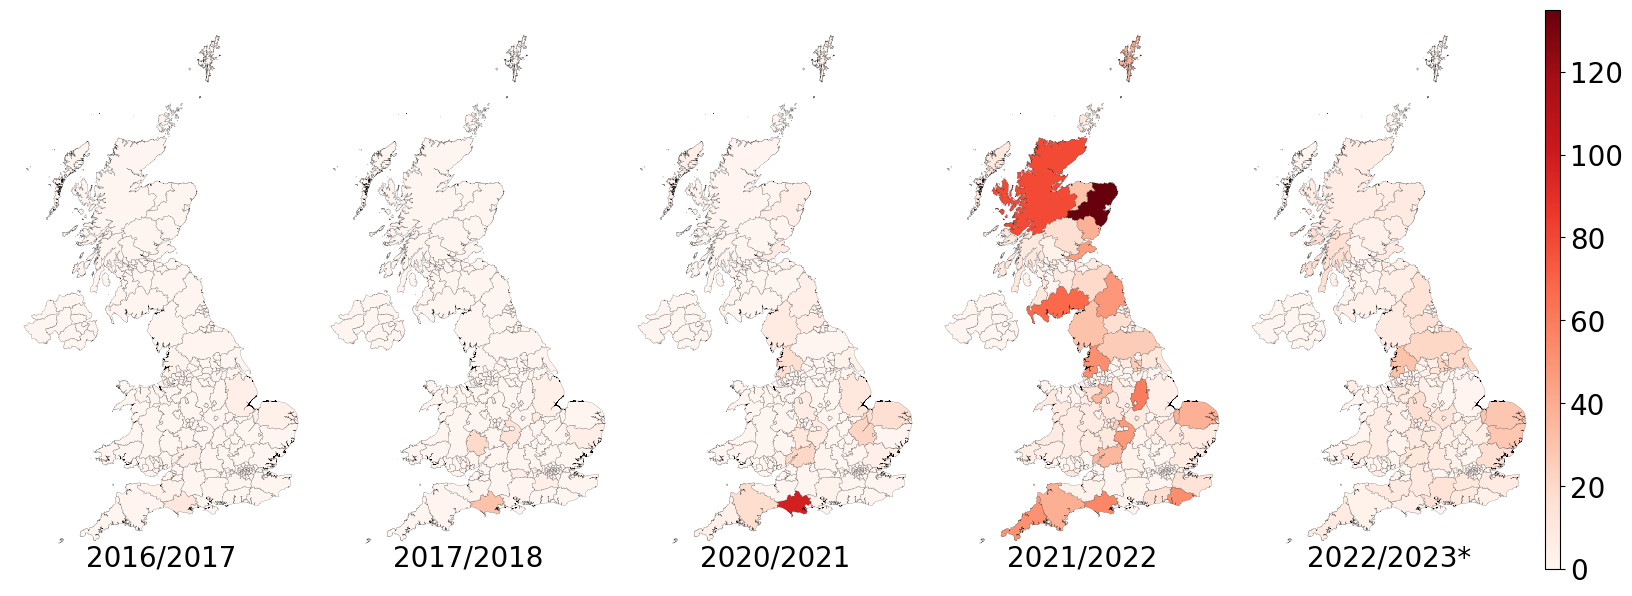

In [14]:
seasons = ["2016/2017","2017/2018","2020/2021","2021/2022","2022/2023*"]
max_outbreaks = max([by_location_data[s.strip("*")]["cases"].max() for s in seasons])

fig = plt.figure(figsize = (20,100))
grid = ImageGrid(fig, 111,
                nrows_ncols = (1,5),
                axes_pad = 0.05,
                cbar_location = "right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.05
                )

for i in range(5):
    shapefile["outbreaks"] = by_location_data[seasons[i].strip("*")]["cases"]
    imc = shapefile.plot(ax = grid[i],column = "outbreaks",cmap = "Reds",vmin=0, vmax=max_outbreaks,legend = False,edgecolor='black',linewidth = 0.1)
    
    grid[i].axis('off')
    grid[i].set_title(seasons[i],y=-0.01)

norm = Normalize(vmin=0, vmax=max_outbreaks)
n_cmap = cm.ScalarMappable(norm=norm, cmap='Reds')
n_cmap.set_array([])
plt.colorbar(n_cmap, cax=grid.cbar_axes[0])

plt.savefig("uk_wildbird_cases.png",bbox_inches='tight')

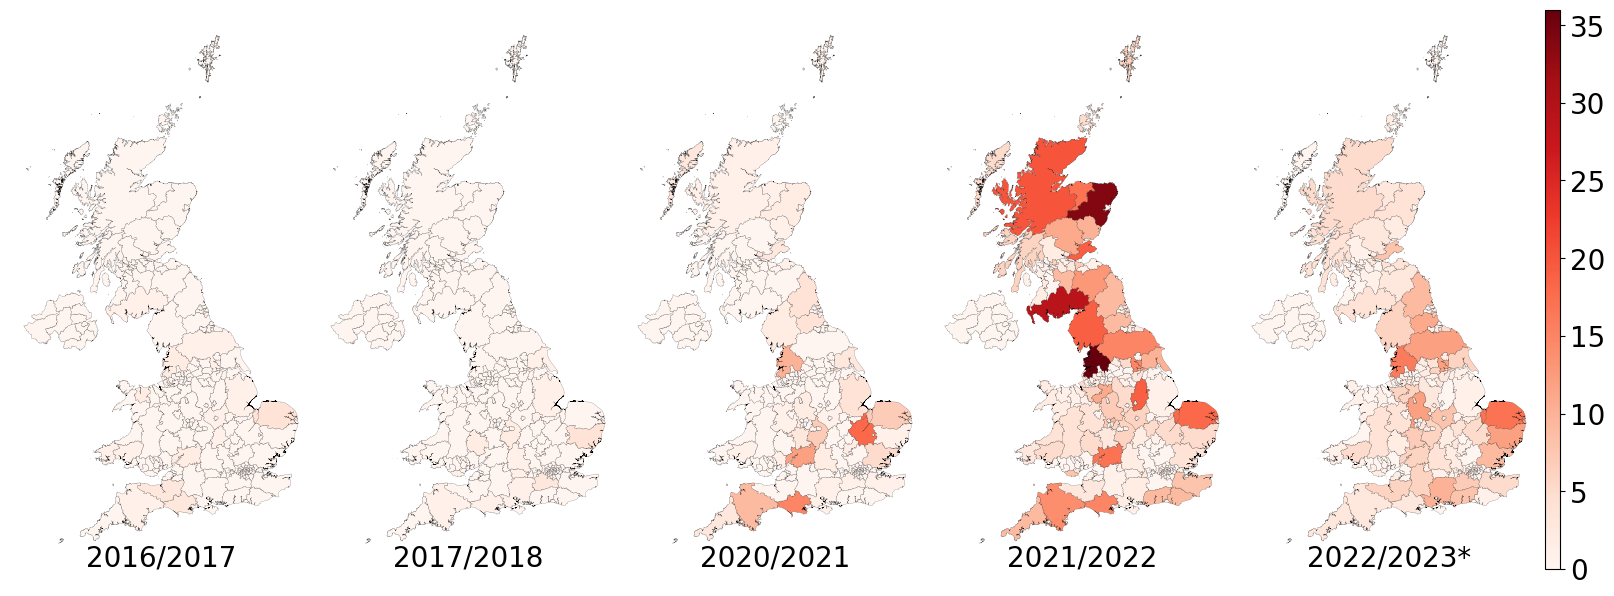

In [15]:
seasons = ["2016/2017","2017/2018","2020/2021","2021/2022","2022/2023*"]
max_outbreaks = max([by_location_data[s.strip("*")]["outbreaks"].max() for s in seasons])

fig = plt.figure(figsize = (20,100))
grid = ImageGrid(fig, 111,
                nrows_ncols = (1,5),
                axes_pad = 0.05,
                cbar_location = "right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.05
                )

for i in range(5):
    shapefile["outbreaks"] = by_location_data[seasons[i].strip("*")]["outbreaks"]
    shapefile.plot(ax = grid[i],column = "outbreaks",cmap = "Reds",vmin=0, vmax=max_outbreaks,legend = False,edgecolor='black',linewidth = 0.1)
    
    grid[i].axis('off')
    grid[i].set_title(seasons[i],y=-0.01)

norm = Normalize(vmin=0, vmax=max_outbreaks)
n_cmap = cm.ScalarMappable(norm=norm, cmap='Reds')
n_cmap.set_array([])
plt.colorbar(n_cmap, cax=grid.cbar_axes[0])

plt.savefig("images/uk_wildbird_outbreaks.png",bbox_inches='tight')

# Seasonal Plots

In [5]:
seasons = ["2016/2017","2017/2018","2020/2021","2021/2022","2022/2023*"]
seasonal_data = pd.read_csv("data/wild_bird_data/ai-findings-all-locations-matched.csv",usecols = [2,5,7,6],names=["cases","date","season","county"],header = None,skiprows = [0])
seasonal_data["date"] = seasonal_data["date"].map(lambda d: datetime.strptime(d, '%d/%m/%Y').date())
seasonal_data

,cases,date,season,county
0,2,2022-01-31,2021/2022,Aberdeenshire
1,1,2022-02-14,2021/2022,Aberdeenshire
2,1,2022-02-28,2021/2022,Aberdeenshire
3,1,2022-03-07,2021/2022,Aberdeenshire
4,1,2022-03-21,2021/2022,Aberdeenshire
...,...,...,...,...
1273,1,2023-02-27,2022/2023,Redcar and Cleveland
1274,1,2023-02-27,2022/2023,Shropshire
1275,1,2023-02-27,2022/2023,Lancashire
1276,2,2023-02-27,2022/2023,Windsor and Maidenhead


In [6]:
D = {}
for s in seasons:
    data = seasonal_data[seasonal_data["season"] == s.strip("*")]
    y = int(s.split("/")[1].strip("*"))
    D[s] = [len(  data[ (data["date"]<=date(y-1,12,31))  &  (data["date"]>date(y-1,10,1)) ]),
            len(  data[ (data["date"]<=date(y,3,31))  &  (data["date"]>date(y,1,1)) ]),
            len(  data[ (data["date"]<=date(y,6,30))  &  (data["date"]>date(y,4,1)) ]),
            len(  data[ (data["date"]<=date(y,9,30))  &  (data["date"]>date(y,7,1)) ]) ]

In [7]:
D["2021/2022"][0] + D["2021/2022"][1]

425

In [8]:
D["2021/2022"][2] + D["2021/2022"][3]

244

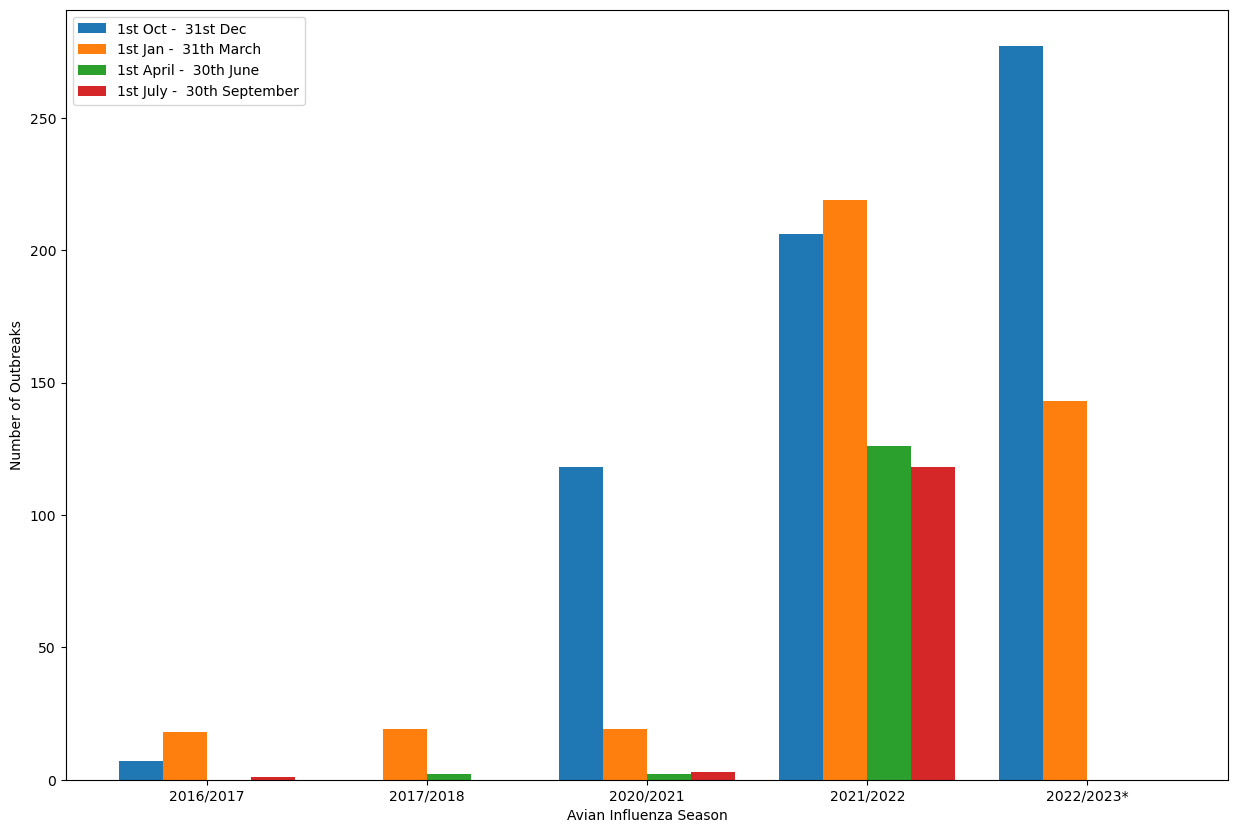

In [8]:
fig, ax = plt.subplots(1,1,figsize = (15,10))

Y1 = [D[s][0] for s in seasons]
Y2 = [D[s][1] for s in seasons]
Y3 = [D[s][2] for s in seasons]
Y4 = [D[s][3] for s in seasons]

X_axis = np.arange(len(seasons))
  
ax.bar(X_axis - 0.3, Y1, 0.2, label = '1st Oct -  31st Dec')
ax.bar(X_axis - 0.1, Y2, 0.2, label = '1st Jan -  31th March')
ax.bar(X_axis + 0.1, Y3, 0.2, label = '1st April -  30th June')
ax.bar(X_axis + 0.3, Y4, 0.2, label = '1st July -  30th September')


ax.set_xticks(X_axis, seasons)
ax.set_xlabel("Avian Influenza Season")
ax.set_ylabel("Number of Outbreaks")
ax.legend(loc = "upper left")

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)

plt.savefig("images/uk_wildbird_outbreaks_by_3mo.png",bbox_inches='tight')

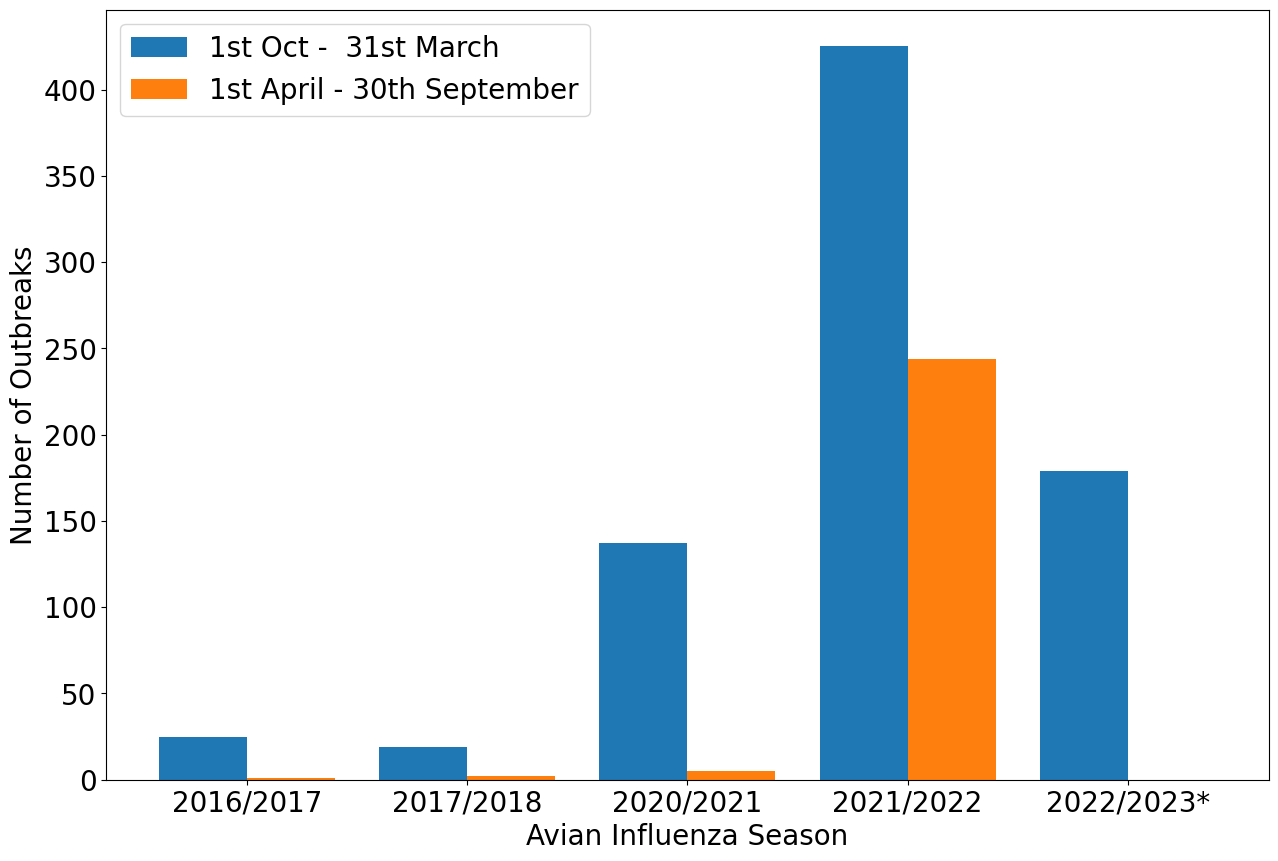

In [11]:
fig, ax = plt.subplots(1,1,figsize = (15,10))

Y1 = [D[s][0]+D[s][1] for s in seasons]
Y2 = [D[s][2]+D[s][3] for s in seasons]


X_axis = np.arange(len(seasons))
  
ax.bar(X_axis - 0.2, Y1, 0.4, label = '1st Oct -  31st March')
ax.bar(X_axis + 0.2, Y2, 0.4, label = '1st April - 30th September')


ax.set_xticks(X_axis, seasons)
ax.set_xlabel("Avian Influenza Season")
ax.set_ylabel("Number of Outbreaks")
ax.legend(loc = "upper left")

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)

plt.savefig("images/uk_wildbird_outbreaks_by_6mo.png",bbox_inches='tight')

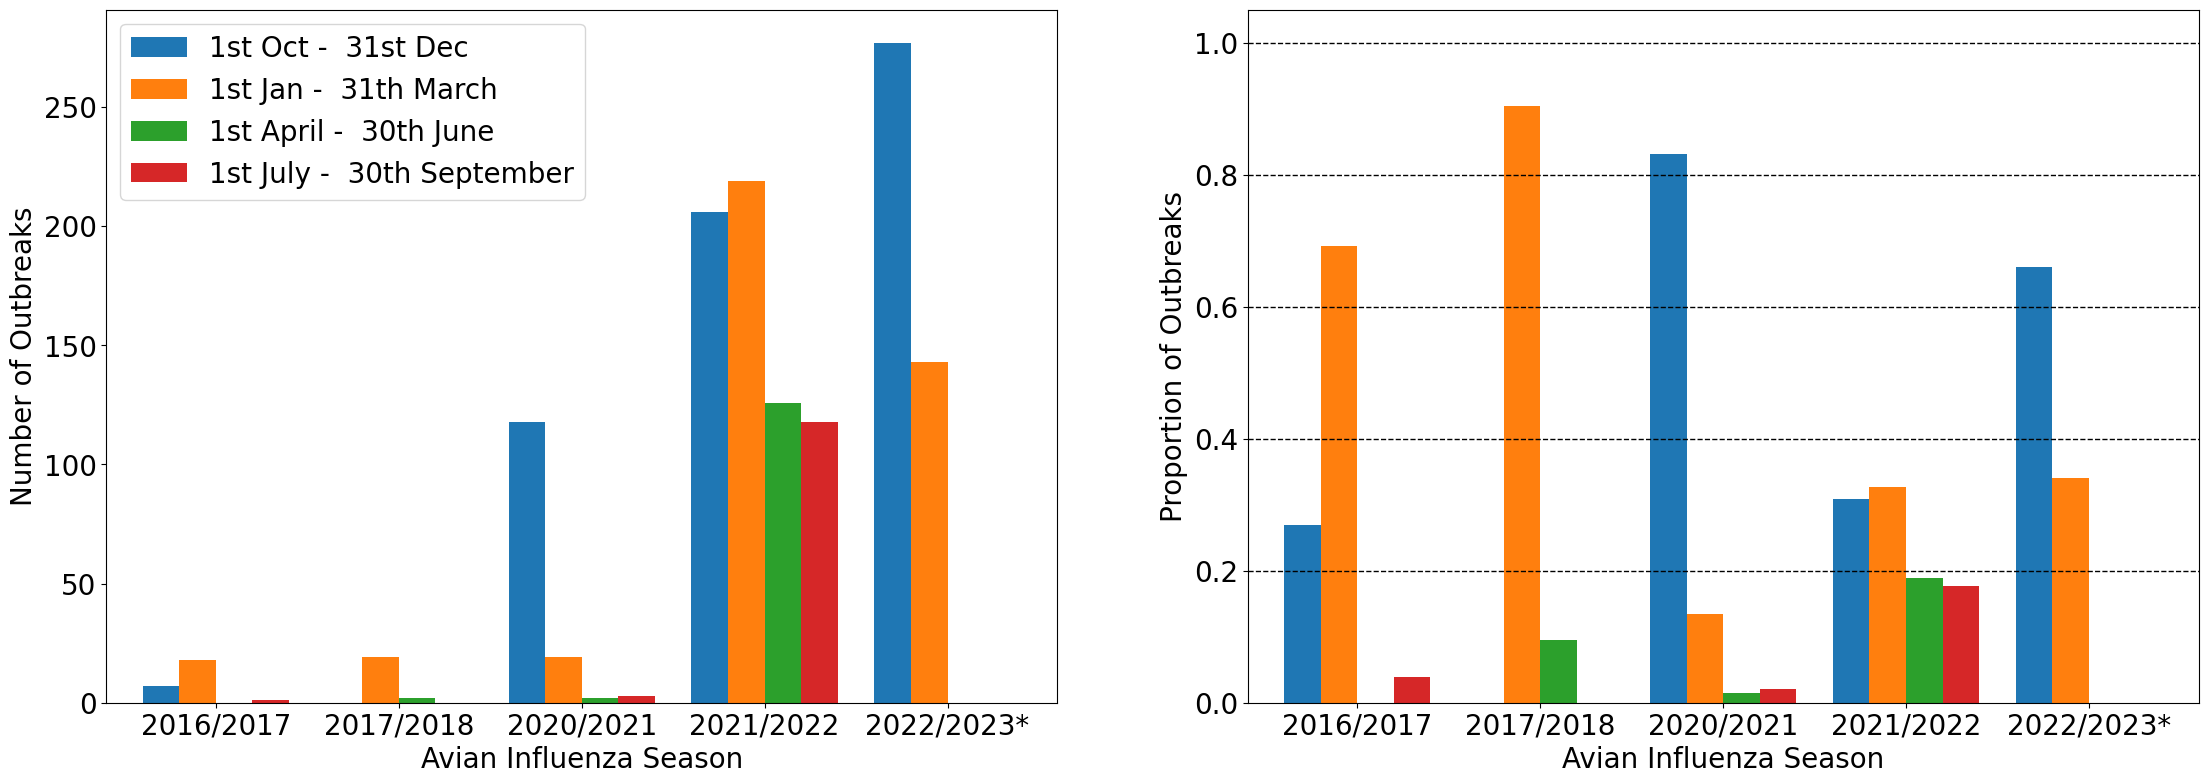

In [17]:
fig, ax = plt.subplots(1,2,figsize = (27,9))

Y1 = [D[s][0] for s in seasons]
Y2 = [D[s][1] for s in seasons]
Y3 = [D[s][2] for s in seasons]
Y4 = [D[s][3] for s in seasons]

X_axis = np.arange(len(seasons))
  
ax[0].bar(X_axis - 0.3, Y1, 0.2, label = '1st Oct -  31st Dec')
ax[0].bar(X_axis - 0.1, Y2, 0.2, label = '1st Jan -  31th March')
ax[0].bar(X_axis + 0.1, Y3, 0.2, label = '1st April -  30th June')
ax[0].bar(X_axis + 0.3, Y4, 0.2, label = '1st July -  30th September')


ax[0].set_xticks(X_axis, seasons)
ax[0].set_xlabel("Avian Influenza Season")
ax[0].set_ylabel("Number of Outbreaks")
ax[0].legend(loc = "upper left")
ax[0].set_xlim(-0.6,4.6)

#trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
#ax[0].text(0.0, 1.0, "a)", transform=ax[0].transAxes + trans,
            #fontsize=20, va='bottom', fontfamily='serif')

S = {}
for s in seasons:
    S[s] = sum(D[s])

Y5 = [D[s][0]/S[s] for s in seasons]
Y6 = [D[s][1]/S[s] for s in seasons]
Y7 = [D[s][2]/S[s] for s in seasons]
Y8 = [D[s][3]/S[s] for s in seasons]

X_axis = np.arange(len(seasons))
  
ax[1].bar(X_axis - 0.3, Y5, 0.2, label = '1st Oct -  31st Dec')
ax[1].bar(X_axis - 0.1, Y6, 0.2, label = '1st Jan -  31th March')
ax[1].bar(X_axis + 0.1, Y7, 0.2, label = '1st April -  30th June')
ax[1].bar(X_axis + 0.3, Y8, 0.2, label = '1st July -  30th September')

ax[1].set_xticks(X_axis, seasons)
ax[1].set_xlabel("Avian Influenza Season")
ax[1].set_ylabel("Proportion of Outbreaks")

for i in range(5):
    y = (i+1)/5
    ax[1].hlines(y=y, xmin=-0.6, xmax=4.6, linewidth=1, color='black',linestyles = "dashed")
    
ax[1].set_xlim(-0.6,4.6)

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)


#ax[1].text(0.0, 1.0, "b)", transform=ax[1].transAxes + trans,
            #fontsize=20, va='bottom', fontfamily='serif')

plt.savefig("images/uk_wildbird_outbreaks_by_3mo_prop.png",bbox_inches='tight')


# 08/02/2023 adding more data

In [31]:
extra_case_data = pd.read_csv("data/wild_bird_data/extra_data.csv",encoding = "ISO-8859-1")

In [43]:
extra_case_data

,Week number,Location,Number of findings,Species involved,Total number of birds testing positive,Subtype,Year,week,date
0,Week 48 (2022),Angus,2,Common Buzzard,2,H5N1 HPAI,2022,48,2022-11-28
1,Week 48 (2022),City of Bradford,2,"Unspecified Swan, Canada Goose",3,H5N1 HPAI,2022,48,2022-11-28
2,Week 48 (2022),Derby,1,Sparrowhawk,1,H5N1 HPAI,2022,48,2022-11-28
3,Week 48 (2022),Dumfries and Galloway,1,Barnacle Goose,1,H5N1 HPAI,2022,48,2022-11-28
4,Week 48 (2022),East Hampshire,1,Unspecified Bird of Prey,1,H5N1 HPAI,2022,48,2022-11-28
...,...,...,...,...,...,...,...,...,...
236,Week 9 (2023),Redcar and Cleveland,1,Mute Swan (1),1,H5N1 (HPAI),2023,9,2023-02-27
237,Week 9 (2023),Shropshire,1,Common Buzzard (1),1,H5N1 (HPAI),2023,9,2023-02-27
238,Week 9 (2023),West Lancashire,1,Pink Footed Goose (1),1,H5N1 (HPAI),2023,9,2023-02-27
239,Week 9 (2023),Windsor and Maidenhead,2,Canada Goose (2),2,H5N1 (HPAI),2023,9,2023-02-27


In [44]:
extra_case_data["week"] = extra_case_data["Week number"].map(lambda x: int(x[4:-6]))
extra_case_data["date"] = extra_case_data.apply(lambda x: datetime.strptime(str(x["Year"])+ "-W" + str(x["week"]) + "-1", "%Y-W%W-%w"), axis = 1)
extra_case_data.to_csv("data/wild_bird_data/extra_data.csv")

In [90]:
for x in shapefile["CTYUA21NM"]:
    if "Hillingdon" == x:
        print("ok")


ok
